In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
data.shape

(1338, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [9]:
data['sex'].unique

<bound method Series.unique of 0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object>

In [10]:
data['sex'] = data['sex'].map({'male':0, 'female':1})

In [11]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [12]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [13]:
data['smoker'] = data['smoker'].map({'yes':1, 'no':0})
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [14]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [15]:
data['region'] = data['region'].map({'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3 })
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [16]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [17]:
X = data.drop(['charges'], axis=1)
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,0
1,18,0,33.770,1,0,1
2,28,0,33.000,3,0,1
3,33,0,22.705,0,0,2
4,32,0,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2
1334,18,1,31.920,0,0,3
1335,18,1,36.850,0,0,1
1336,21,1,25.800,0,0,0


In [18]:
y = data['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train

,age,sex,bmi,children,smoker,region
560,46,1,19.950,2,0,2
1285,47,1,24.320,0,0,3
1142,52,1,24.860,0,0,1
969,39,1,34.320,5,0,1
486,54,1,21.470,3,0,2
...,...,...,...,...,...,...
1095,18,1,31.350,4,0,3
1130,39,1,23.870,5,0,1
1294,58,0,25.175,0,0,3
860,37,1,47.600,2,1,0


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

svm = SVR()
svm.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)


GradientBoostingRegressor()

In [23]:
y_pred_lr = lr.predict(X_test)
y_pred_svm = svm = svm.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)

In [24]:
df1 = pd.DataFrame({'Actual': y_test, 'Lr': y_pred_lr, 'Svm': y_pred_svm, 'Rf': y_pred_rf, 'Gb': y_pred_gb})
df1

,Actual,Lr,Svm,Rf,Gb
764,9095.06825,8924.407244,9548.508358,10883.266788,11001.128629
887,5272.17580,7116.295018,9493.273216,5449.597574,5840.174656
890,29330.98315,36909.013521,9648.284435,28247.222607,28001.980112
1293,9301.89355,9507.874691,9555.227910,10615.075956,9745.291602
259,33750.29180,27013.350008,9421.503455,34397.266002,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.406264,46862.500322,45431.423211
575,12222.89830,11814.555568,9625.037388,12625.948988,12465.025294
535,6067.12675,7638.107736,9504.823116,6310.433676,6974.336525
543,63770.42801,40959.081722,9604.850953,46828.556076,47862.047791


In [25]:
import matplotlib.pyplot as plt 

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

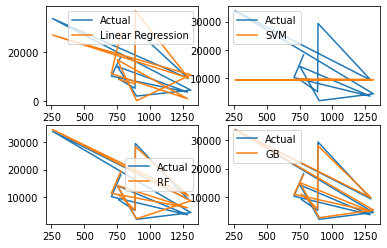

In [26]:
plt.subplot (221)
plt.plot(df1['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df1['Lr'].iloc[0:11], label = "Linear Regression")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df1['Svm'].iloc[0:11], label = 'SVM')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df1['Rf'].iloc[0:11], label = 'RF')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df1['Gb'].iloc[0:11], label = 'GB')
plt.legend()

plt.tight_layout

In [27]:
from sklearn import metrics

In [28]:
score_lr = metrics.r2_score(y_test, y_pred_lr)
score_svm = metrics.r2_score(y_test, y_pred_svm)
score_rf = metrics.r2_score(y_test, y_pred_rf)
score_gb = metrics.r2_score(y_test, y_pred_gb)
print('Score_lr: ', score_lr, 'Score_svm: ', score_svm, 'Score_rf: ', score_rf, 'Score_gb: ', score_gb)

Score_lr:  0.7833463107364539 Score_svm:  -0.07230871519427229 Score_rf:  0.8675464725515697 Score_gb:  0.8779726251291786


In [29]:
error_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
error_svm = metrics.mean_absolute_error(y_test, y_pred_svm)
error_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
error_gb = metrics.mean_absolute_error(y_test, y_pred_gb)
print('Error_lr: ', error_lr, 'Error_svm; ', error_svm, 'Error_rf: ', error_rf, 'Error_gb: ', error_gb)

Error_lr:  4186.508898366434 Error_svm;  8592.808814043312 Error_rf:  2463.047651262377 Error_gb:  2447.9515580545844


In [30]:
data_new_customer = {'age':40,	
                     'sex':1,	
                     'bmi':40.30,	
                     'children':4,	
                     'smoker': 1,	
                     'region':2}
df_new_cus = pd.DataFrame(data_new_customer, index=[0])
df_new_cus 



,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [31]:
pred_new_cus = gb.predict(df_new_cus)
pred_new_cus

array([44088.03936436])

In [32]:
gb = GradientBoostingRegressor()
gb.fit(X,y)

GradientBoostingRegressor()

In [33]:
import joblib

joblib.dump(gb, 'model_joblib_gb')

['model_joblib_gb']

In [34]:
model = joblib.load('model_joblib_gb')

In [35]:
model.predict(df_new_cus)

array([43262.52723738])

In [36]:
from tkinter import *
import joblib

In [42]:
def show_entry():
  p1 = float(entry1.get())
  p2 = float(entry2.get())
  p3 = float(entry3.get())
  p4 = float(entry4.get())
  p5 = float(entry5.get())
  p6 = float(entry6.get())

  model = joblib.load('model_joblib_gb')
  result = model.predict([[p1,p2,p3,p4,p5,p6]])

  Label(master, text = 'Your Health Insurance Cost Prediction is:').grid(row=7)
  Label(master, text = result).grid(row=8)


In [43]:
master = Tk()
master.title("Insurance Cost Prediction")

label = Label(master, text= "Insurance Cost Prediction", fg='black').grid(row=0, columnspan= 2)

Label(master, text = 'Enter your age').grid(row=1)
Label(master, text = 'Enter your gender: male (1) or female (0)').grid(row=2)
Label(master, text = 'Enter your BMI value').grid(row=3)
Label(master, text = 'Enter your number of childrens').grid(row=4)
Label(master, text = 'Are you smoker? Yes(1) or No(0)').grid(row=5)
Label(master, text = 'Enter your region: SW(0), SE(1), NW(2), NE(3)').grid(row=6)

entry1 = Entry(master)
entry2 = Entry(master)
entry3 = Entry(master)
entry4 = Entry(master)
entry5 = Entry(master)
entry6 = Entry(master)

entry1.grid(row=1, column=1)
entry2.grid(row=2, column=1)
entry3.grid(row=3, column=1)
entry4.grid(row=4, column=1)
entry5.grid(row=5, column=1)
entry6.grid(row=6, column=1)

Button (master, text = 'Predict', command = show_entry).grid()

master.mainloop()

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
